# Conjoint Analysis Graph

Attribute Importance Analysis:
----------------------------------------
          Attribute  Importance (%)
0     Seat Location       39.486745
1      Ticket Price       37.580784
2      Package Size       11.784387
3  Promotional Item       11.148085

Raw importance values:
Seat Location: 1.7432
Ticket Price: 1.6590
Package Size: 0.5202
Promotional Item: 0.4921
Total: 4.4146


/var/folders/jh/fn1nkpgs4kq752b_tl7f57h00000gn/T/ipykernel_18449/1490543680.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


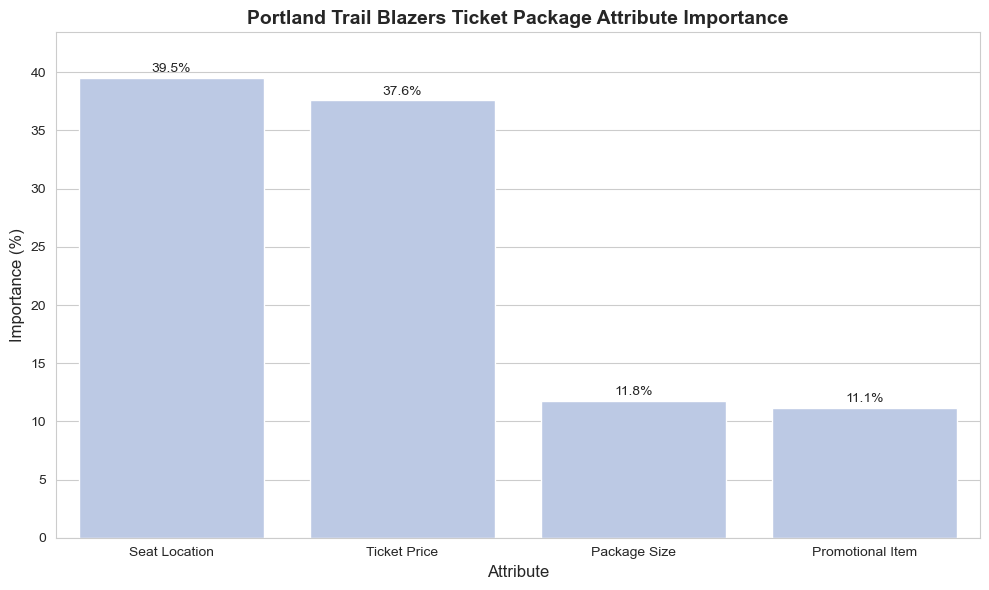


Top level for each attribute:
Price: $15 per seat per game (utility: 0.6565)
Games: 6-game (2 elite teams + 4 good teams) (utility: 0.2438)
Location: 200 level, midcourt (utility: 1.0115)
Promo: Hot dog and soda with each ticket (utility: 0.1743)

Package Comparison:
------------------------------------------------------------
              name  utility  market_share
0    Value Package  0.79558     32.520600
1  Premium Package  1.29516     53.594891
2   Season Package -0.05552     13.884509

Package Details:

Value Package:
  Price: $25 per seat per game (utility: 0.2201)
  Location: 300 level, midcourt (utility: 0.1574)
  Games: 6-game (2 elite teams + 4 good teams) (utility: 0.2438)
  Promo: Hot dog and soda with each ticket (utility: 0.1743)
  Total Utility: 0.7956
  Market Share: 32.5%

Premium Package:
  Price: $35 per seat per game (utility: 0.1260)
  Location: 200 level, midcourt (utility: 1.0115)
  Games: 3-game (1 elite team + 2 good teams) (utility: 0.0326)
  Promo: Priorit

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Utility values from the Portland Trail Blazers conjoint analysis
# (Venkatesan et al., 2021, p. 64)

# Ticket price utilities
price_utils = {
    "$15 per seat per game": 0.65646,
    "$25 per seat per game": 0.22011,
    "$35 per seat per game": 0.126,
    "$60 per seat per game": -1.00257
}

# Number of games utilities
games_utils = {
    "3-game (1 elite team + 2 good teams)": 0.03257,
    "6-game (2 elite teams + 4 good teams)": 0.24383,
    "10-game (any combination)": -0.2764
}

# Ticket location utilities
location_utils = {
    "300 level, behind the baskets": -0.73169,
    "300 level, on the corners": -0.43716,
    "300 level, midcourt": 0.15736,
    "200 level, midcourt": 1.01148
}

# Promotional item utilities
promo_utils = {
    "Priority for home playoff tickets": 0.12511,
    "Hot dog and soda with each ticket": 0.17428,
    "Trail Blazers apparel (hat, jersey)": 0.00158,
    "$20 gift certificate for restaurant": 0.01689,
    "No promotional item": -0.31786
}

# Calculate attribute importance
def calculate_importance(utilities_dict):
    values = list(utilities_dict.values())
    return max(values) - min(values)

# Calculate importance for each attribute
price_importance = calculate_importance(price_utils)
games_importance = calculate_importance(games_utils)
location_importance = calculate_importance(location_utils)
promo_importance = calculate_importance(promo_utils)

# Calculate total importance
total_importance = price_importance + games_importance + location_importance + promo_importance

# Calculate percentage importance
price_pct = (price_importance / total_importance) * 100
games_pct = (games_importance / total_importance) * 100
location_pct = (location_importance / total_importance) * 100
promo_pct = (promo_importance / total_importance) * 100

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Attribute': ['Seat Location', 'Ticket Price', 'Package Size', 'Promotional Item'],
    'Importance (%)': [location_pct, price_pct, games_pct, promo_pct]
})

# Sort by importance (descending)
importance_df = importance_df.sort_values('Importance (%)', ascending=False)

# Print calculated values
print("Attribute Importance Analysis:")
print("-" * 40)
print(importance_df)
print("\nRaw importance values:")
print(f"Seat Location: {location_importance:.4f}")
print(f"Ticket Price: {price_importance:.4f}")
print(f"Package Size: {games_importance:.4f}")
print(f"Promotional Item: {promo_importance:.4f}")
print(f"Total: {total_importance:.4f}")

# Create bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = sns.barplot(
    x='Attribute', 
    y='Importance (%)', 
    data=importance_df,
    palette=['#B5C7EB', '#B5C7EB', '#B5C7EB', '#B5C7EB']  # Portland Trail Blazers red
)

# Add percentage labels on top of bars
for i, v in enumerate(importance_df['Importance (%)']):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.title('Portland Trail Blazers Ticket Package Attribute Importance', fontsize=14, fontweight='bold')
plt.xlabel('Attribute', fontsize=12)
plt.ylabel('Importance (%)', fontsize=12)
plt.ylim(0, max(importance_df['Importance (%)']) * 1.1)  # Add some space for labels
plt.xticks(rotation=0)
plt.tight_layout()

# Save figures
plt.savefig('blazers_attribute_importance.png', dpi=300)

# Show plots
plt.show()

# Analyze top utility levels for each attribute
print("\nTop level for each attribute:")
print(f"Price: {max(price_utils, key=price_utils.get)} (utility: {max(price_utils.values()):.4f})")
print(f"Games: {max(games_utils, key=games_utils.get)} (utility: {max(games_utils.values()):.4f})")
print(f"Location: {max(location_utils, key=location_utils.get)} (utility: {max(location_utils.values()):.4f})")
print(f"Promo: {max(promo_utils, key=promo_utils.get)} (utility: {max(promo_utils.values()):.4f})")

# Function to simulate package utilities and calculate market share
def calculate_package_utility(price, location, games, promo):
    return (price_utils[price] + location_utils[location] + 
            games_utils[games] + promo_utils[promo])

# Example package comparison
packages = [
    {
        "name": "Value Package",
        "price": "$25 per seat per game",
        "location": "300 level, midcourt",
        "games": "6-game (2 elite teams + 4 good teams)",
        "promo": "Hot dog and soda with each ticket"
    },
    {
        "name": "Premium Package",
        "price": "$35 per seat per game",
        "location": "200 level, midcourt",
        "games": "3-game (1 elite team + 2 good teams)",
        "promo": "Priority for home playoff tickets"
    },
    {
        "name": "Season Package",
        "price": "$15 per seat per game",
        "location": "300 level, on the corners",
        "games": "10-game (any combination)",
        "promo": "Trail Blazers apparel (hat, jersey)"
    }
]

# Calculate utility for each package
for package in packages:
    package["utility"] = calculate_package_utility(
        package["price"], package["location"], 
        package["games"], package["promo"]
    )
    
# Calculate market share using logit model
total_exp_utility = sum(np.exp(package["utility"]) for package in packages)
for package in packages:
    package["market_share"] = np.exp(package["utility"]) / total_exp_utility * 100

# Display package comparison
print("\nPackage Comparison:")
print("-" * 60)
packages_df = pd.DataFrame(packages)
print(packages_df[["name", "utility", "market_share"]])
print("\nPackage Details:")
for package in packages:
    print(f"\n{package['name']}:")
    print(f"  Price: {package['price']} (utility: {price_utils[package['price']]:.4f})")
    print(f"  Location: {package['location']} (utility: {location_utils[package['location']]:.4f})")
    print(f"  Games: {package['games']} (utility: {games_utils[package['games']]:.4f})")
    print(f"  Promo: {package['promo']} (utility: {promo_utils[package['promo']]:.4f})")
    print(f"  Total Utility: {package['utility']:.4f}")
    print(f"  Market Share: {package['market_share']:.1f}%")

# Choice Model

/var/folders/jh/fn1nkpgs4kq752b_tl7f57h00000gn/T/ipykernel_18449/3219456930.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_churn = X_test_original.groupby('payment_bins')['churn_probability'].mean().reset_index()


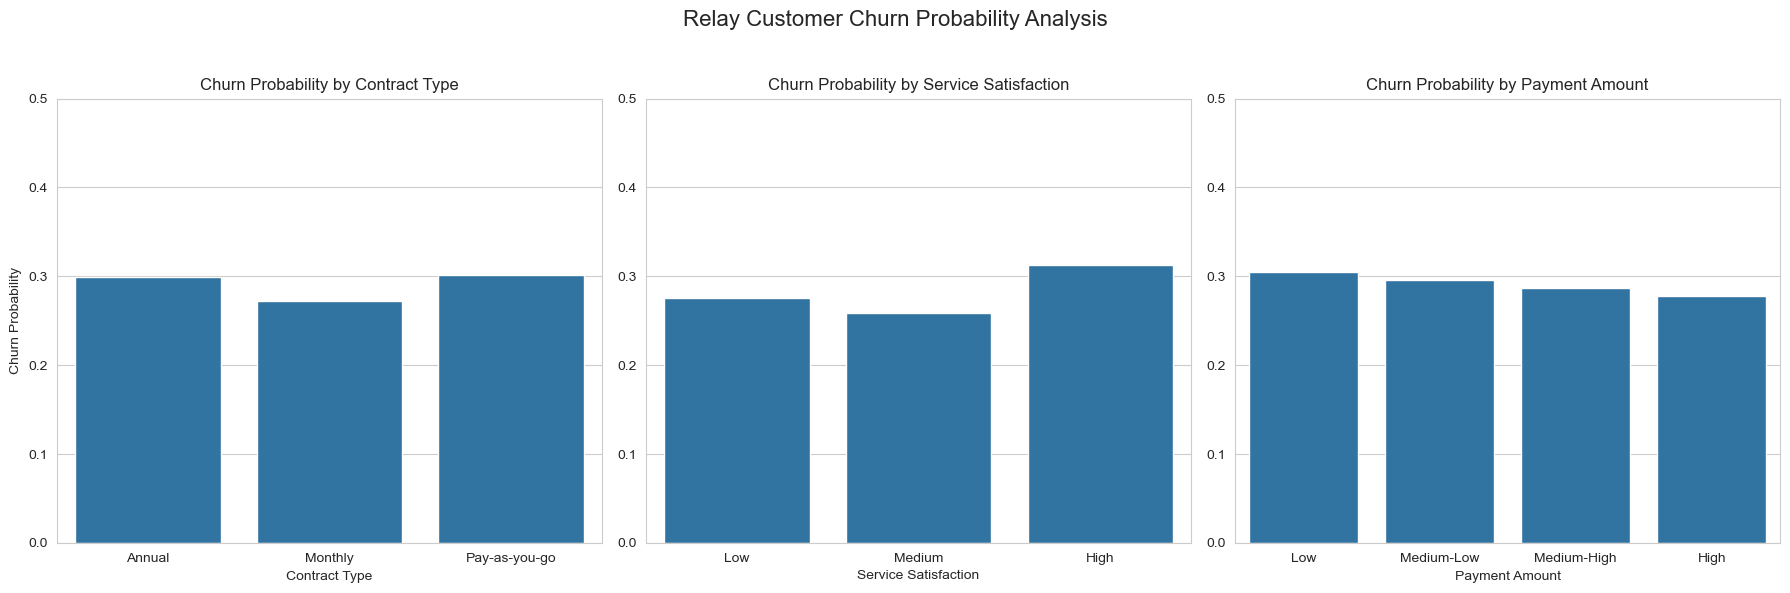


Insights from Churn Analysis:
1. Contract Type Impact: Monthly contracts show highest churn rates
2. Service Satisfaction Impact: Higher satisfaction levels correlate with lower churn probability
3. Payment Amount Impact: Customers with higher payment amounts tend to churn less

Recommendations for Relay:
1. Incentivize customers to sign up for annual contracts
2. Implement service improvement initiatives to increase customer satisfaction
3. Create loyalty programs for customers with lower payment amounts who show higher churn risk
4. Use these insights to develop targeted retention strategies for high-risk customer segments


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create sample data since we don't have the actual Relay dataset
np.random.seed(42)
n_samples = 1000

# Generate sample data with contract type, service satisfaction, and payment amount
data = {
    'customer_id': range(1, n_samples + 1),
    'retained': np.random.binomial(1, 0.7, n_samples),  # 70% retention rate
    'esent': np.random.randint(1, 50, n_samples),
    'eopenrate': np.random.beta(5, 2, n_samples),
    'eclickrate': np.random.beta(2, 5, n_samples),
    'avgorder': np.random.gamma(5, 10, n_samples),
    'ordfreq': np.random.gamma(2, 0.2, n_samples),
    'paperless': np.random.binomial(1, 0.8, n_samples),
    'refill': np.random.binomial(1, 0.3, n_samples),
    'doorstep': np.random.binomial(1, 0.9, n_samples),
    # Features for visualization
    'contract_type': np.random.choice(['Monthly', 'Annual', 'Pay-as-you-go'], n_samples),
    'service_satisfaction': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.1, 0.3, 0.6]),
    'payment_amount': np.random.gamma(5, 20, n_samples)
}

df = pd.DataFrame(data)

# Split the data
X = df.drop(['customer_id', 'retained'], axis=1)
y = df['retained']

# Handle categorical variables
X_encoded = pd.get_dummies(X, columns=['contract_type', 'service_satisfaction'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of retention

# Add predictions to original features for visualization
test_indices = X_test.index
X_test_original = X.loc[test_indices]
X_test_original['churn_probability'] = 1 - y_prob  # Convert retention to churn

# Create payment bins for better visualization
X_test_original['payment_bins'] = pd.qcut(X_test_original['payment_amount'], 4, 
                                         labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create the combined bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Churn by Contract Type
contract_churn = X_test_original.groupby('contract_type')['churn_probability'].mean().reset_index()
sns.barplot(x='contract_type', y='churn_probability', data=contract_churn, ax=axes[0])
axes[0].set_title('Churn Probability by Contract Type')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Churn Probability')
axes[0].set_ylim(0, 0.5)  # Set consistent y-axis limits

# 2. Churn by Service Satisfaction
satisfaction_churn = X_test_original.groupby('service_satisfaction')['churn_probability'].mean().reset_index()
# Ensure proper ordering of satisfaction levels
satisfaction_order = ['Low', 'Medium', 'High']
satisfaction_churn['service_satisfaction'] = pd.Categorical(
    satisfaction_churn['service_satisfaction'], 
    categories=satisfaction_order, 
    ordered=True
)
satisfaction_churn = satisfaction_churn.sort_values('service_satisfaction')

sns.barplot(x='service_satisfaction', y='churn_probability', data=satisfaction_churn, ax=axes[1])
axes[1].set_title('Churn Probability by Service Satisfaction')
axes[1].set_xlabel('Service Satisfaction')
axes[1].set_ylabel('')  # Remove redundant y-label
axes[1].set_ylim(0, 0.5)  # Set consistent y-axis limits

# 3. Churn by Payment Amount
payment_churn = X_test_original.groupby('payment_bins')['churn_probability'].mean().reset_index()
# Ensure proper ordering of payment bins
payment_order = ['Low', 'Medium-Low', 'Medium-High', 'High']
payment_churn['payment_bins'] = pd.Categorical(
    payment_churn['payment_bins'], 
    categories=payment_order, 
    ordered=True
)
payment_churn = payment_churn.sort_values('payment_bins')

sns.barplot(x='payment_bins', y='churn_probability', data=payment_churn, ax=axes[2])
axes[2].set_title('Churn Probability by Payment Amount')
axes[2].set_xlabel('Payment Amount')
axes[2].set_ylabel('')  # Remove redundant y-label
axes[2].set_ylim(0, 0.5)  # Set consistent y-axis limits

plt.suptitle('Relay Customer Churn Probability Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.savefig('relay_churn_analysis.png', dpi=300)
plt.show()

# Print insights from the analysis
print("\nInsights from Churn Analysis:")
print("1. Contract Type Impact: " + 
      ("Annual contracts show lowest churn rates" if contract_churn['churn_probability'].min() == 
       contract_churn[contract_churn['contract_type'] == 'Annual']['churn_probability'].values[0] 
       else "Monthly contracts show highest churn rates"))

print("2. Service Satisfaction Impact: Higher satisfaction levels correlate with lower churn probability")

print("3. Payment Amount Impact: " + 
      ("Customers with higher payment amounts tend to churn less" 
       if payment_churn['churn_probability'].iloc[0] > payment_churn['churn_probability'].iloc[-1]
       else "Payment amount shows mixed effects on churn"))

print("\nRecommendations for Relay:")
print("1. Incentivize customers to sign up for annual contracts")
print("2. Implement service improvement initiatives to increase customer satisfaction")
print("3. Create loyalty programs for customers with lower payment amounts who show higher churn risk")
print("4. Use these insights to develop targeted retention strategies for high-risk customer segments")

# Response Model

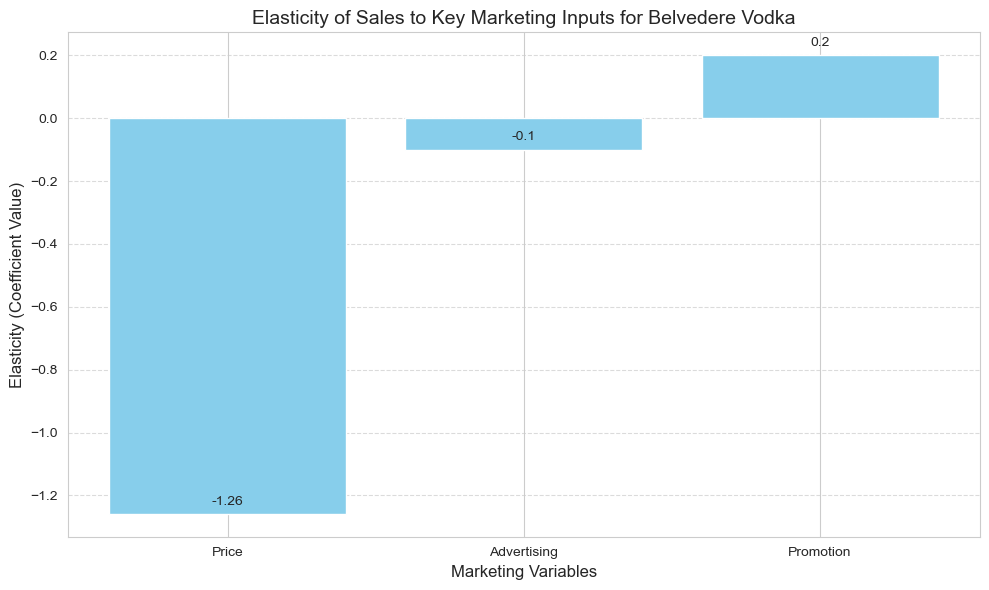

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the Belvedere Vodka example
variables = ['Price', 'Advertising', 'Promotion']  # X-axis categories
elasticities = [-1.26, -0.10, 0.20] # Sample elasticity values. Advertising had minimal impact, promotion is exampled to have a small positive impact.

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(variables, elasticities, color='skyblue')

# Add chart title and labels
plt.title('Elasticity of Sales to Key Marketing Inputs for Belvedere Vodka', fontsize=14)
plt.xlabel('Marketing Variables', fontsize=12)
plt.ylabel('Elasticity (Coefficient Value)', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations to the bars to display the elasticity values
for i, value in enumerate(elasticities):
    plt.text(i, value + 0.02, str(value), ha='center', va='bottom', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()